# Лабораторная №3 

Импорт библиотек

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve


Загрузим датасет - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

In [4]:
data = load_wine()
X = data.data
y = data.target

Разделим выборку на обучающую и тестовую

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Начнём обучение модели ближайших соседей.
Произвольный заданный гиперпараетр k = 7

In [6]:
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

Проведём предсказаниена тестовой выборке

In [7]:
y_predict = knn.predict(X_test)

Оценим качество модели на тестовой выборке

In [8]:
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average = 'micro')
recall = recall_score(y_test, y_predict, average = 'micro')
print("Метрики на тестовой выборке:")
print("Accuracy:", accuracy)
print("Precision:", precision,)
print("Recall:", recall)

Метрики на тестовой выборке:
Accuracy: 0.6944444444444444
Precision: 0.6944444444444444
Recall: 0.6944444444444444


Сделаем кросс-валидацию

In [9]:
cv_scores = cross_val_score(knn, X, y, cv=5)
print("Средняя точность на кросс-валидации:", np.mean(cv_scores))

Средняя точность на кросс-валидации: 0.6806349206349206


Проведём подбор гиперпараметра k с использованием GridSearchCV

In [10]:
param_grid = {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)
print("Наилучшее значение гиперпараметра k:", grid_search.best_params_)
print("Наилучшая точность:", grid_search.best_score_)

Наилучшее значение гиперпараметра k: {'n_neighbors': 1}
Наилучшая точность: 0.7250793650793651


Проведём повторное обучение модели с оптимальным значением гиперпарамера k

In [11]:
best_k = grid_search.best_params_['n_neighbors']
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Проведём повторную оценку качества модели с оптимальным значением k

In [12]:
y_pred_best = knn_best.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average = 'micro')
recall_best = recall_score(y_test, y_pred_best, average = 'micro')
print("\nМетрики на тестовой выборке с оптимальным значением k:")
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)


Метрики на тестовой выборке с оптимальным значением k:
Accuracy: 0.7777777777777778
Precision: 0.7777777777777778
Recall: 0.7777777777777778


Построим кривый обучения и валидации

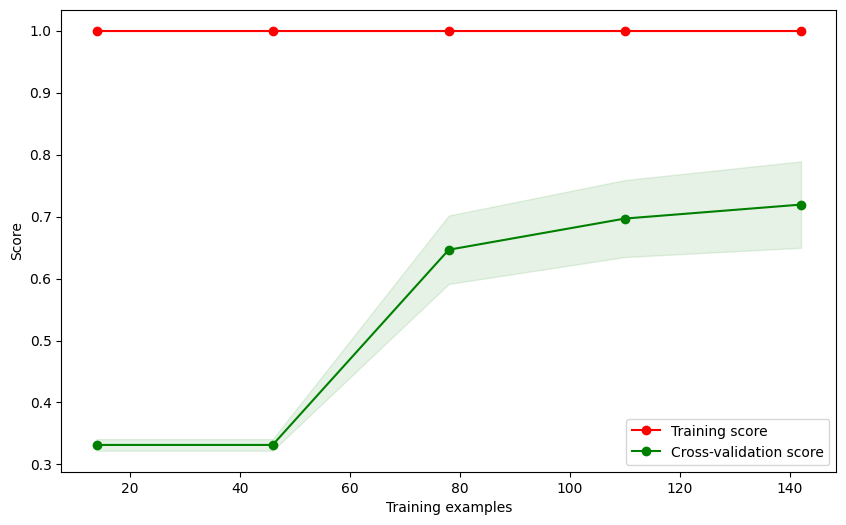

In [13]:
train_sizes, train_scores, test_scores = learning_curve(
    knn_best, X, y, cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()